In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("concrete_data.csv")
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.shape

(1030, 9)

In [4]:
data.duplicated().sum()

25

In [4]:
data=data.drop_duplicates()
data.shape

(1005, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1005 non-null   float64
 1   blast_furnace_slag             1005 non-null   float64
 2   fly_ash                        1005 non-null   float64
 3   water                          1005 non-null   float64
 4   superplasticizer               1005 non-null   float64
 5   coarse_aggregate               1005 non-null   float64
 6   fine_aggregate                 1005 non-null   float64
 7   age                            1005 non-null   int64  
 8   concrete_compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [6]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
data.nunique()

cement                           278
blast_furnace_slag               185
fly_ash                          156
water                            195
superplasticizer                 111
coarse_aggregate                 284
fine_aggregate                   302
age                               14
concrete_compressive_strength    845
dtype: int64

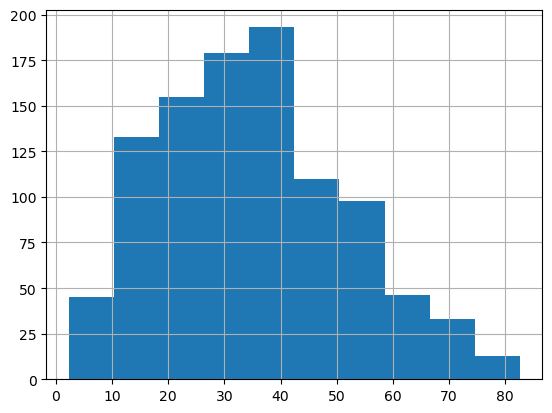

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

data['concrete_compressive_strength'].hist()
plt.show()

The data distribution of target variable is satisfactory to proceed further.There are sufficient number of rows for each type of value to learn from.

## Exploratory Data Analysis

In [9]:
columns=data.columns

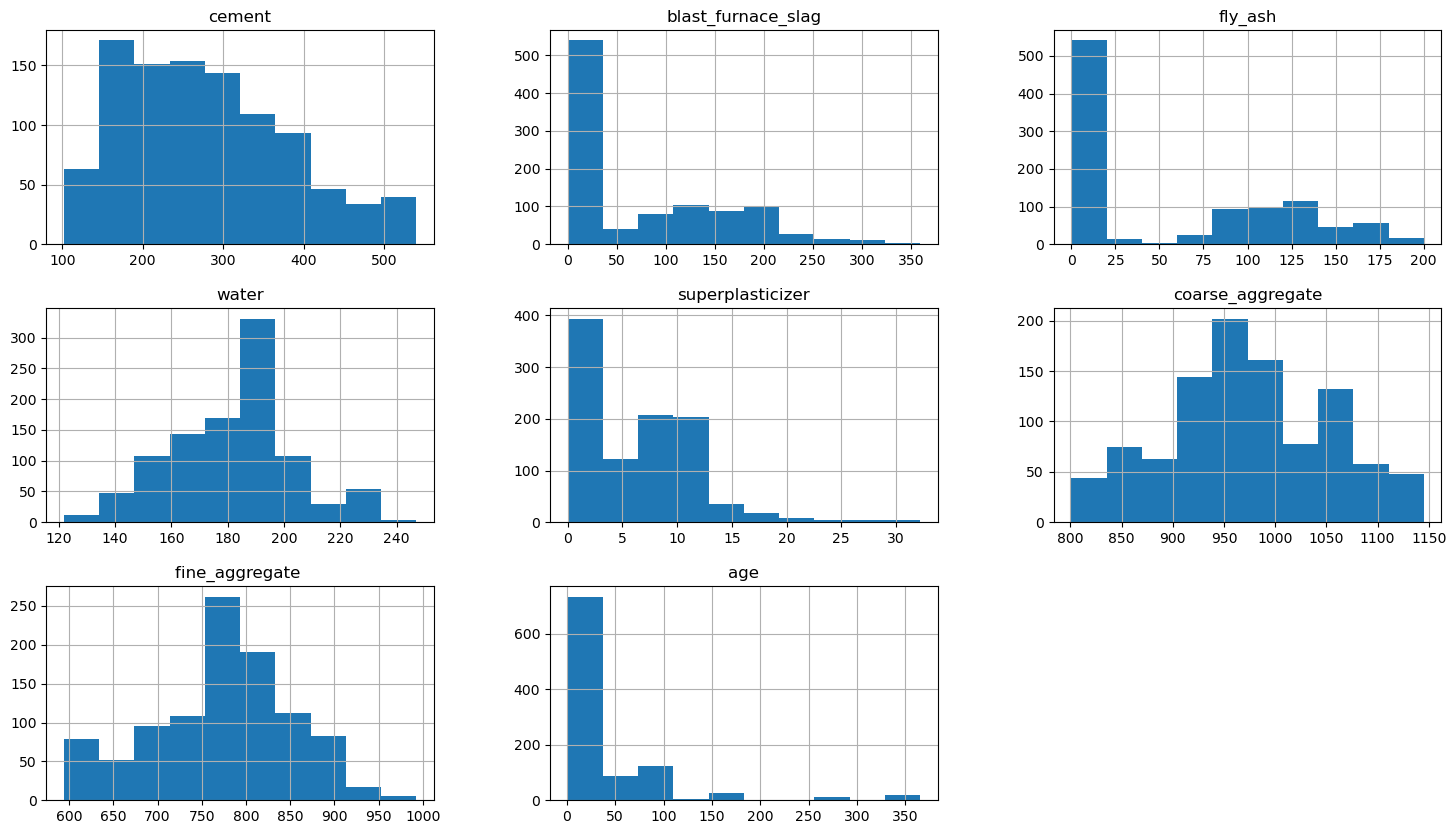

In [10]:
data.hist(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],figsize=(18,10))
plt.show()

In [11]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

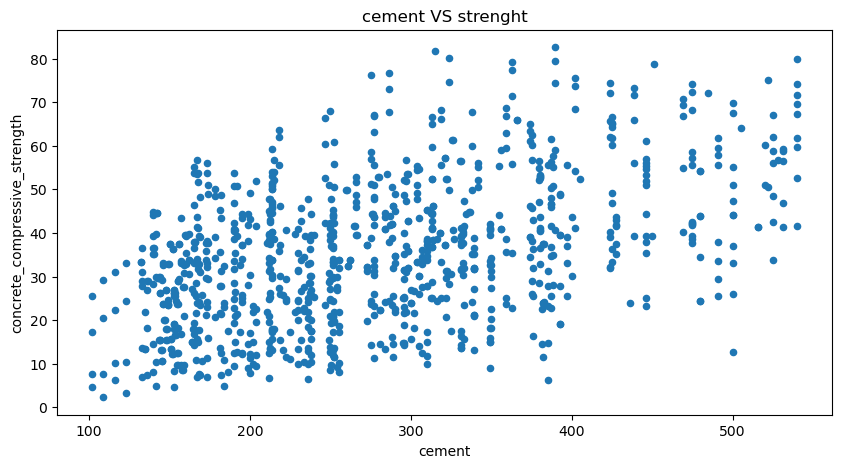

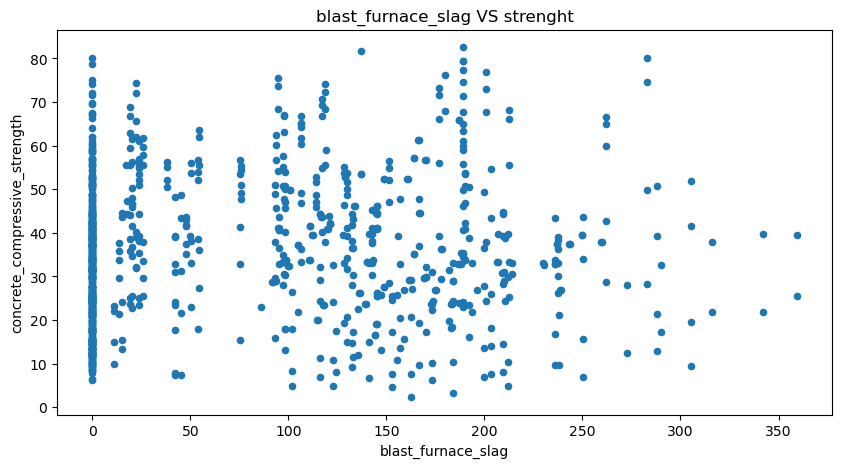

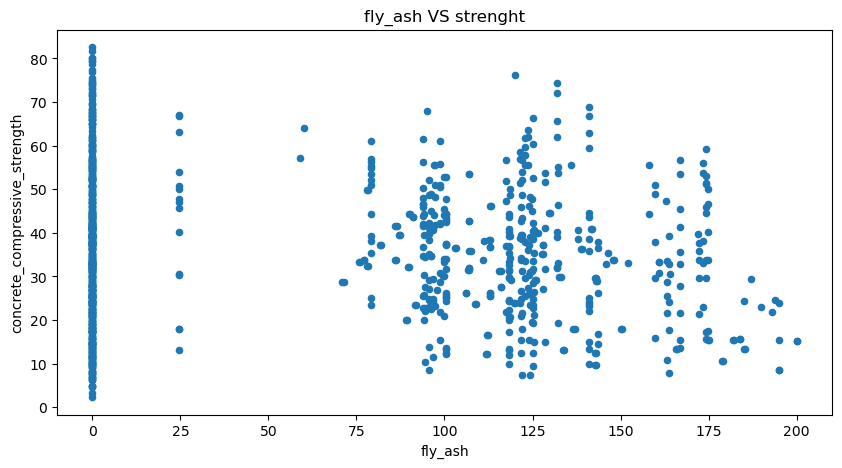

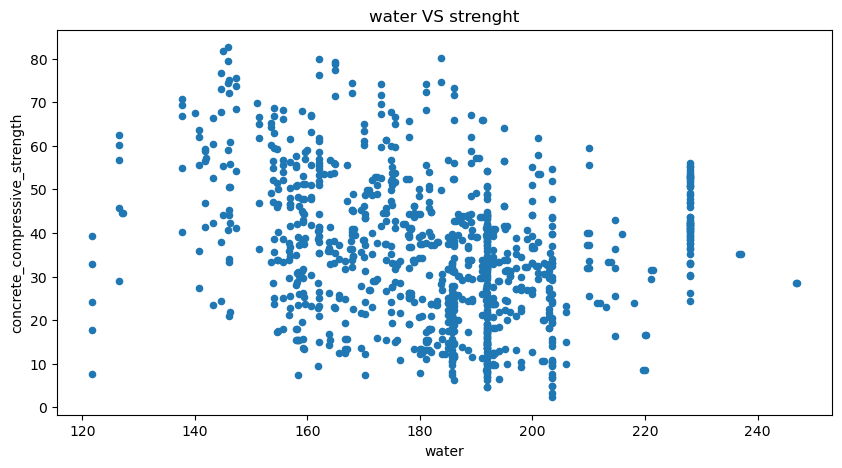

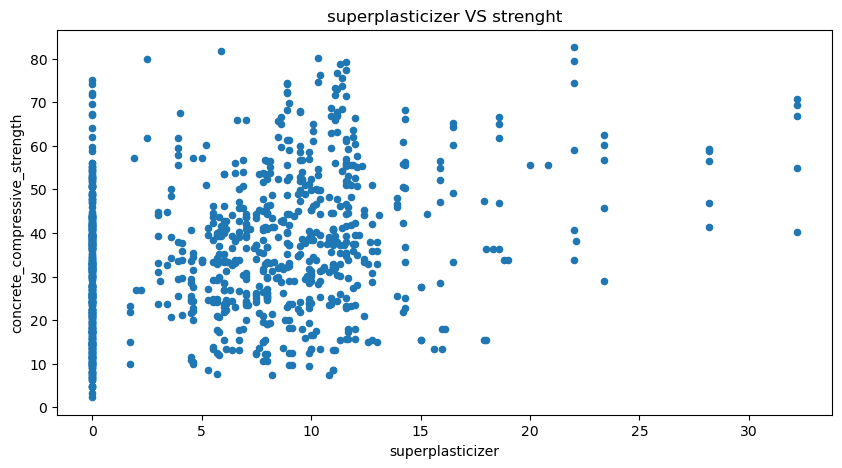

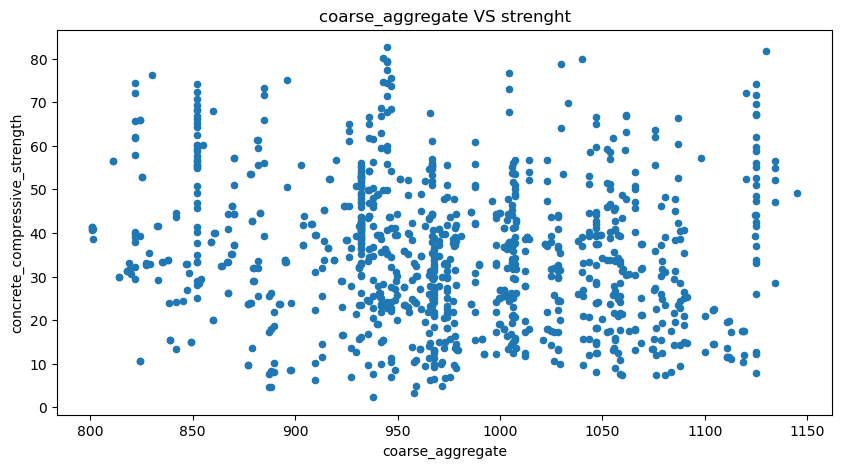

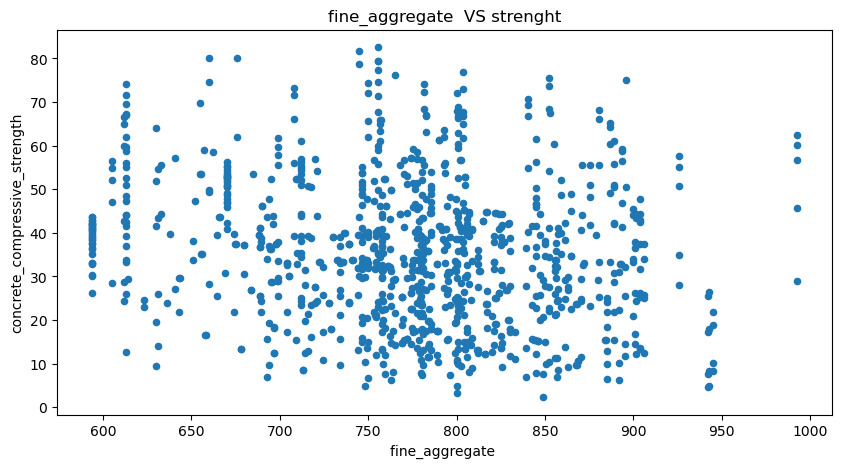

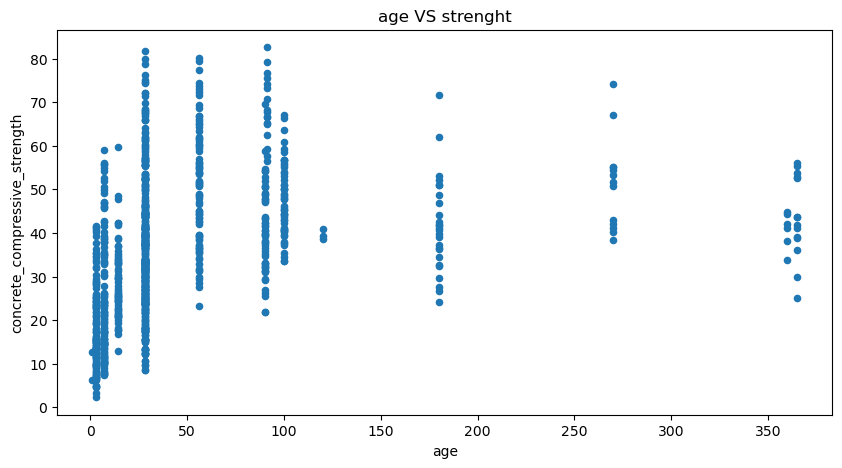

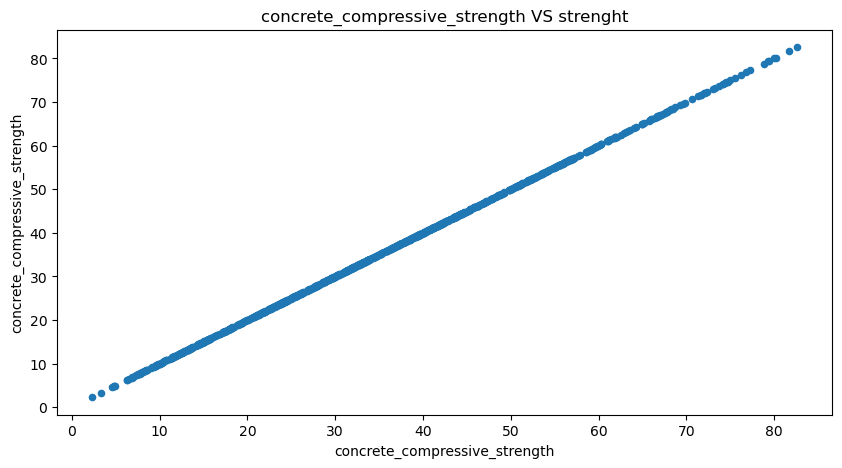

In [12]:
for predictor in columns:
    data.plot.scatter(x=predictor,y='concrete_compressive_strength',figsize=(10,5),title=predictor +" VS "+ "strenght")



In [13]:
correlationData=data[columns].corr()
correlationData

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
blast_furnace_slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
fly_ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarse_aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fine_aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
concrete_compressive_strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [15]:
# Feature Selection using correlation
correlationData['concrete_compressive_strength'][abs(correlationData['concrete_compressive_strength']>0.3)]

cement                           0.488283
superplasticizer                 0.344209
age                              0.337367
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [16]:
Selectedcolumns=['cement','superplasticizer','age','concrete_compressive_strength']

#Selecting Final columns
df=data[Selectedcolumns]
df.head()

,cement,superplasticizer,age,concrete_compressive_strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


In [20]:
df.describe()

,cement,superplasticizer,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,6.033234,45.856716,35.250378
std,104.344261,5.919967,63.734692,16.284815
min,102.000000,0.000000,1.000000,2.330000
25%,190.700000,0.000000,7.000000,23.520000
50%,265.000000,6.100000,28.000000,33.800000
75%,349.000000,10.000000,56.000000,44.870000
max,540.000000,32.200000,365.000000,82.600000


In [23]:
df.to_csv("Concrete.csv",index=False)

cement


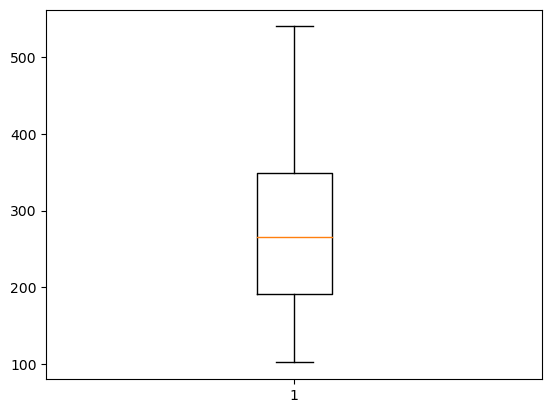

superplasticizer


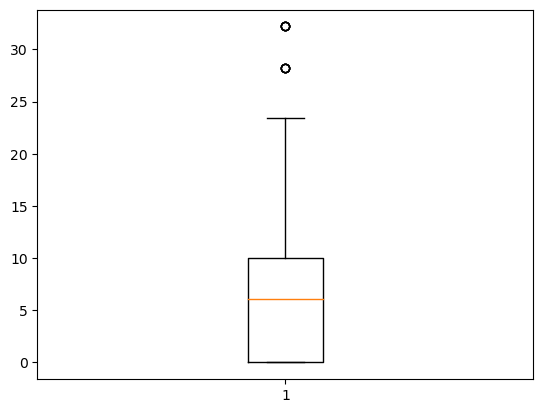

age


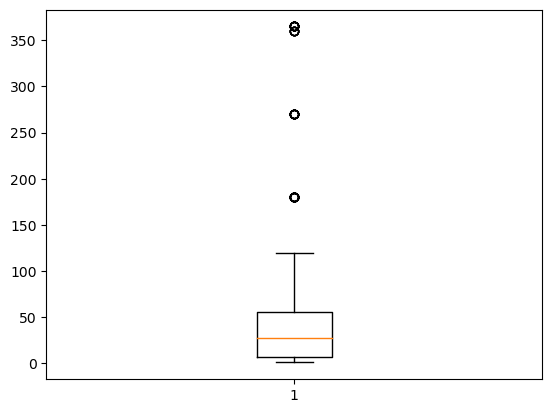

concrete_compressive_strength


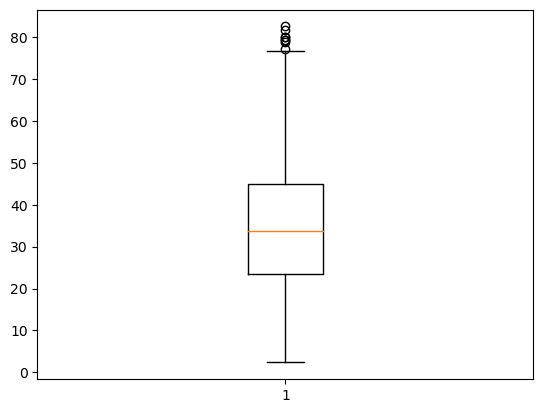

In [19]:
for i in df.columns:
    print(i)
    plt.boxplot(x=df[i])
    plt.show()

In [30]:
X=df.drop('concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

In [80]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


In [81]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(804, 3) (804,) (201, 3) (201,)


In [93]:
# Create a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
#     'AdaBoost Regressor': AdaBoostRegressor()
}

# Create a dictionary of parameter grids for hyperparameter tuning
param_grids = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'Ridge': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'Decision Tree Regressor': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
    'Random Forest Regressor': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'AdaBoost Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5, 1.0]}
}
# Create a dictionary to store results
results = {}

# Perform hyperparameter tuning and evaluation for each model
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    
    # Create a GridSearchCV object for the current model
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    
    # Train the model with the best hyperparameters
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results[model_name] = {
        'Best Hyperparameters': best_params,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse
    }

# Print the results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {metrics['Best Hyperparameters']}")
    print(f"R-squared: {metrics['R-squared']:.4f}")
    print(f"Mean Absolute Error: {metrics['Mean Absolute Error']:.4f}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print()


Model: Linear Regression
Best Hyperparameters: {}
R-squared: 0.4923
Mean Absolute Error: 9.4244
Mean Squared Error: 137.3673

Model: Lasso
Best Hyperparameters: {'alpha': 0.01}
R-squared: 0.4922
Mean Absolute Error: 9.4245
Mean Squared Error: 137.3694

Model: Ridge
Best Hyperparameters: {'alpha': 10.0}
R-squared: 0.4922
Mean Absolute Error: 9.4245
Mean Squared Error: 137.3698

Model: Decision Tree Regressor
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}
R-squared: 0.7316
Mean Absolute Error: 6.0822
Mean Squared Error: 72.6122

Model: Random Forest Regressor
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
R-squared: 0.8223
Mean Absolute Error: 5.2376
Mean Squared Error: 48.0630



In [91]:
input_data=(141.3,0.0,28)

input_numpy=np.asarray(input_data)

reshape=input_numpy.reshape(1,-1)

pred=best_model.predict(reshape)
print(pred)



[26.59062069]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [87]:
X_test

,cement,superplasticizer,age
816,525.0,0.0,7
133,286.3,11.2,28
648,141.3,0.0,28
675,183.9,0.0,90
914,313.0,8.0,28
...,...,...,...
481,446.0,11.6,56
338,275.1,9.9,100
888,153.0,8.0,28
935,156.0,7.0,28


In [88]:
y_test

816    42.42
133    67.70
648    29.89
675    32.53
914    41.05
       ...  
481    61.07
338    58.61
888    19.01
935    29.41
801    19.69
Name: concrete_compressive_strength, Length: 201, dtype: float64